In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
saginaw_president = pd.read_csv('./saginaw-president.txt')
saginaw_straight_party = pd.read_csv('./saginaw-straight-party.txt')

In [21]:
saginaw_straight_party['sp_total'] = (
    saginaw_straight_party['dem'] +
    saginaw_straight_party['rep'] +
    saginaw_straight_party['lib'] +
    saginaw_straight_party['ust'] +
    saginaw_straight_party['wcp'] +
    saginaw_straight_party['grn'] +
    saginaw_straight_party['nlp']
)

saginaw_straight_party['percentage_republican'] = saginaw_straight_party['rep'] / saginaw_straight_party['sp_total']

In [24]:
saginaw_president

,precinct_name,registered,votes_cast,turnout,biden,trump,jorgensen,blankenship,hawkins,de_la_fuente,w1,total_votes
0,Albee Township Precinct 1,1662,1121,67.45%,393,707,13,0,1,1,0,1115
1,Birch Run Township Precinct 1,2077,1509,72.65%,537,942,17,3,2,1,2,1504
2,Birch Run Township Precinct 2,1240,834,67.26%,359,461,5,1,6,0,0,832
3,Birch Run Township Precinct 3,1557,1296,83.24%,347,918,24,1,3,0,2,1295
4,Blumfield Township Precinct 1,1593,1318,82.74%,282,1013,10,0,3,0,2,1310
...,...,...,...,...,...,...,...,...,...,...,...,...
80,Tittabawassee Township Precinct 1,2212,1741,78.71%,645,1053,20,3,4,1,2,1728
81,Tittabawassee Township Precinct 2,1753,1425,81.29%,501,892,16,2,3,0,2,1416
82,Tittabawassee Township Precinct 3,1298,996,76.73%,308,665,11,3,3,0,1,991
83,Tittabawassee Township Precinct 4,1912,1530,80.02%,556,946,14,0,3,1,3,1523


In [25]:
saginaw_president['total_votes'] = (
    saginaw_president['biden'] +
    saginaw_president['trump'] +
    saginaw_president['jorgensen'] +
    saginaw_president['blankenship'] +
    saginaw_president['hawkins'] +
    saginaw_president['de_la_fuente'] +
    saginaw_president['w1']
)

saginaw_president['trump_vote_percentage'] = saginaw_president['trump'] / saginaw_president['total_votes']

In [27]:
# Axes
straight_republican_percentage = saginaw_straight_party['percentage_republican'].tolist()
trump_relative_performance = (saginaw_president['trump_vote_percentage'] - saginaw_straight_party['percentage_republican']).tolist()

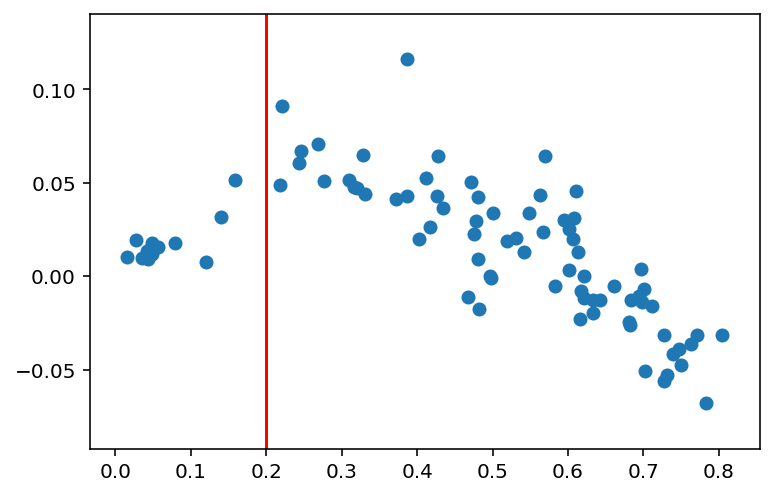

In [59]:
plt.scatter(
    straight_republican_percentage,
    trump_relative_performance
)

plt.axvline(x=0.2, color='red')

plt.show()